# Imoprting the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
df = pd.read_csv('data/data_science_job.csv')
df.shape
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = df.drop_duplicates()
df.shape

(1405, 12)

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,£33K - £39K (Glassdoor Est.),About Us\nWe want to help small businesses win...,3.9,Funding Circle UK\n3.9,"London, England",501 to 1000 Employees,2010.0,Company - Private,Lending,Finance,$50 to $100 million (USD)
1,Graduate Data Scientist - Modelling,£33K - £39K (Glassdoor Est.),Who are we?\nWe want to help small businesses ...,3.9,Funding Circle UK\n3.9,"London, England",501 to 1000 Employees,2010.0,Company - Private,Lending,Finance,$50 to $100 million (USD)
3,Data Scientist,£33K - £39K (Glassdoor Est.),Data Scientist\nWe are looking for someone tra...,-1.0,720 Management,"London, England",-1,-1.0,-1,-1,-1,-1
4,Extended Assurance –Data Analytics and Innovat...,£33K - £39K (Glassdoor Est.),Extended Assurance –Data Analytics and Innovat...,3.8,Ernst & Young\n3.8,"Bristol, England",10000+ Employees,1989.0,Company - Private,Accounting,Accounting & Legal,$10+ billion (USD)
5,"Principal Data Scientist - Remote, UK",£33K - £39K (Glassdoor Est.),"Optum, the fastest growing part of UnitedHealt...",3.6,UnitedHealth Group\n3.6,"London, England",-1,-1.0,-1,-1,-1,-1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1405 non-null   object 
 1   Salary Estimate    1405 non-null   object 
 2   Job Description    1404 non-null   object 
 3   Rating             1405 non-null   float64
 4   Company Name       1405 non-null   object 
 5   Location           1405 non-null   object 
 6   Size               1403 non-null   object 
 7   Founded            1404 non-null   float64
 8   Type of ownership  1404 non-null   object 
 9   Industry           1405 non-null   object 
 10  Sector             1405 non-null   object 
 11  Revenue            1403 non-null   object 
dtypes: float64(2), object(10)
memory usage: 142.7+ KB


In [6]:
#company Name Remove rating
#city location only
#company age
#description (Skills: Python, SQL, R, AWS, Tablue, PowerBI etc)

# Data Cleaning

In [7]:
#title
def job_t(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'analyst' in title.lower():
        return 'data analyst'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower() or 'ml' in title.lower():
        return 'machine learning engineer'
    else :
        return 'na'

def seniority(title):
    if 'graduate' in title.lower() or 'jr' in title.lower() or 'junior' in title.lower() or 'Interim' in title.lower() or 'apprenticeship' in title.lower():
        return 'junior'
    if 'lead' in title.lower() or 'sr' in title.lower() or 'senior ' in title.lower() or 'principal' in title.lower() or 'manager' in title.lower() or 'advanced' in title.lower() or 'snr' in title.lower():
        return 'senior'
    else:
        return 'na'
    

df['job_title'] = df['Job Title'].apply(job_t)
df['seniority_level'] = df['Job Title'].apply(seniority)

df = df[df.job_title != 'na']


In [8]:
#df['job_title'].value_counts()
#df['seniority_level'].value_counts()
#df['remote'].value_counts()
#df['Job Title'].unique()

In [9]:
#Salary
#Determining the Average salary 

df = df[df['Salary Estimate'] != "-1"] 
Salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
Salary_num = Salary.apply(lambda x: x.replace('K','').replace('£','').replace(' ',''))
df['min_salary'] = Salary_num.apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = Salary_num.apply(lambda x: int(x.split('-')[-1]))
df['Avg_salary'] = (df['min_salary'] + df['max_salary'])/2

In [10]:
#df.shape
#df['Salary Estimate'].value_counts()
#Salary.unique()
#Salary_num.unique()

In [11]:
#Company
#removing /n from the company name
df['company_name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])
#company_name.unique()

In [12]:
#City
#finding only the city name from location details
df['city'] = df['Location'].apply(lambda x: x.split(',')[0])
#df['Location'].value_counts()
#df['city'].value_counts()
#df['city'].unique()

In [13]:
#Age
#Determining age of the company by subtracting current year from the founded year 
df['age'] = df.Founded.apply(lambda x: x if x<1 else 2021 - x)

In [14]:
#description
#Finding skill requirement from description
#(Skills: Python, SQL, R, AWS, tableau, PowerBI, Spark, excel, azure)

df['Job Description'] = df['Job Description'].astype(str)

#python
df['py_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
#sql
df['sql_yn'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
#R
df['R_yn'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
#AWS
df['aws_yn'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
#tableau
df['tableau_yn'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
#R
df['pbi_yn'] = df['Job Description'].apply(lambda x: 1 if 'powerbi' in x.lower() or 'power-bi' in x.lower() or 'power bi' in x.lower()else 0)
#spark
df['spark_yn'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
#excel
df['excel_yn'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
#azure
df['azure_yn'] = df['Job Description'].apply(lambda x: 1 if 'azure' in x.lower() else 0)


In [15]:
#df['Job Description'][0]
#df['py_yn'].value_counts()
#df['sql_yn'].value_counts()
#df['R_yn'].value_counts()
#df['aws_yn'].value_counts()
#df['tab_yn'].value_counts()
#df['spark_yn'].value_counts()
#df['pbi_yn'].value_counts()
#df['spark_yn'].value_counts()
#df['excel'].value_counts()

In [16]:
#df['Type of ownership'].value_counts().sum()
#df['Revenue'].value_counts()

In [17]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,job_title,seniority_level,min_salary,max_salary,Avg_salary,company_name,city,age,py_yn,sql_yn,R_yn,aws_yn,tableau_yn,pbi_yn,spark_yn,excel_yn,azure_yn
0,Data Scientist,£33K - £39K (Glassdoor Est.),About Us\nWe want to help small businesses win...,3.9,Funding Circle UK\n3.9,"London, England",501 to 1000 Employees,2010.0,Company - Private,Lending,Finance,$50 to $100 million (USD),data scientist,na,33,39,36.0,Funding Circle UK,London,11.0,0,0,0,0,0,0,0,0,0
1,Graduate Data Scientist - Modelling,£33K - £39K (Glassdoor Est.),Who are we?\nWe want to help small businesses ...,3.9,Funding Circle UK\n3.9,"London, England",501 to 1000 Employees,2010.0,Company - Private,Lending,Finance,$50 to $100 million (USD),data scientist,junior,33,39,36.0,Funding Circle UK,London,11.0,0,0,0,0,0,0,0,0,0
3,Data Scientist,£33K - £39K (Glassdoor Est.),Data Scientist\nWe are looking for someone tra...,-1.0,720 Management,"London, England",-1,-1.0,-1,-1,-1,-1,data scientist,na,33,39,36.0,720 Management,London,-1.0,0,0,0,0,1,1,0,0,0
5,"Principal Data Scientist - Remote, UK",£33K - £39K (Glassdoor Est.),"Optum, the fastest growing part of UnitedHealt...",3.6,UnitedHealth Group\n3.6,"London, England",-1,-1.0,-1,-1,-1,-1,data scientist,senior,33,39,36.0,UnitedHealth Group,London,-1.0,0,0,0,0,0,0,0,0,0
6,Lead Data Engineer,£33K - £39K (Glassdoor Est.),What you'll do\nAn opportunity has arisen for ...,4.6,Sky Betting & Gaming\n4.6,"Leeds, England",1001 to 5000 Employees,2000.0,Company - Public,Internet,Information Technology,$500 million to $1 billion (USD),data engineer,senior,33,39,36.0,Sky Betting & Gaming,Leeds,21.0,0,0,0,0,0,0,0,0,0


In [18]:
df.describe()

,Rating,Founded,min_salary,max_salary,Avg_salary,age,py_yn,sql_yn,R_yn,aws_yn,tableau_yn,pbi_yn,spark_yn,excel_yn,azure_yn
count,1224.000000,1223.000000,1224.000000,1224.000000,1224.000000,1223.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,2.779248,1247.121832,38.216503,50.165850,44.191176,26.211774,0.175654,0.166667,0.002451,0.063725,0.034314,0.049020,0.050654,0.137255,0.040033
std,2.159031,957.114230,11.893766,15.066854,13.115727,49.872129,0.380681,0.372830,0.049467,0.244363,0.182108,0.215997,0.219379,0.344257,0.196116
min,-1.000000,-1.000000,24.000000,28.000000,26.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.600000,-1.000000,27.000000,39.000000,34.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,1970.000000,35.000000,45.000000,43.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.200000,2004.500000,45.000000,61.000000,53.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2019.000000,76.000000,101.000000,88.500000,331.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization

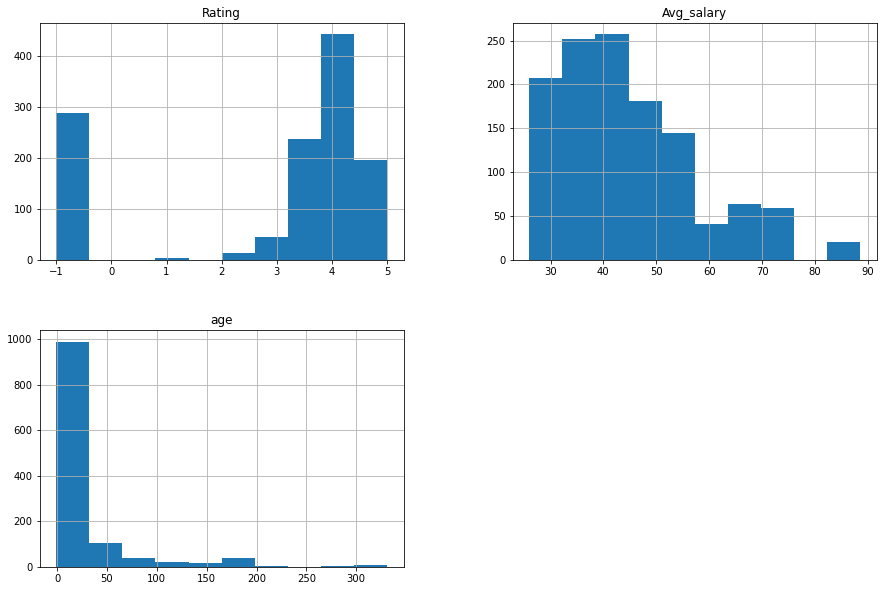

In [19]:
plot = ['Rating', 'Avg_salary','age']

histo = df.hist(plot,figsize=(15,10))

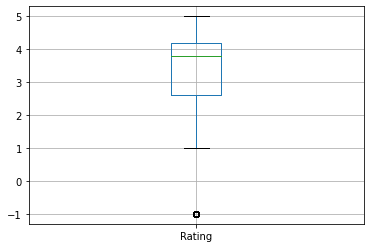

In [20]:
bplot = df.boxplot('Rating')

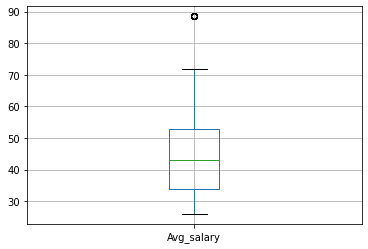

In [21]:
bplot = df.boxplot('Avg_salary')

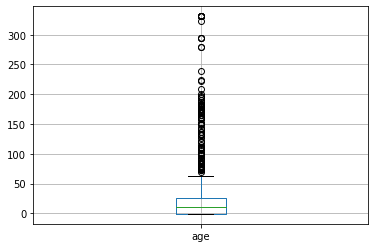

In [22]:
bplot = df.boxplot('age')

<AxesSubplot:>

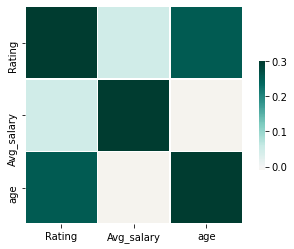

In [23]:
corr = df[plot].corr()

sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap='BrBG')

In [24]:
cat_col = ['Location', 'Size', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'job_title', 'seniority_level',
       'company_name','city', 'py_yn', 'sql_yn', 'R_yn', 'aws_yn', 'tableau_yn', 'pbi_yn',
       'spark_yn', 'excel_yn','azure_yn']

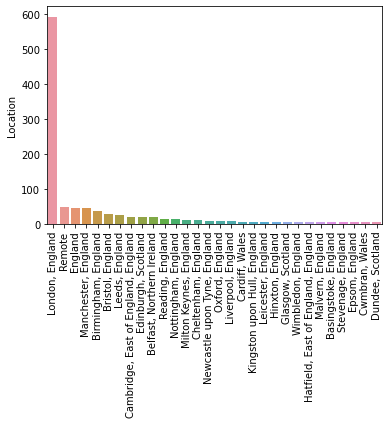

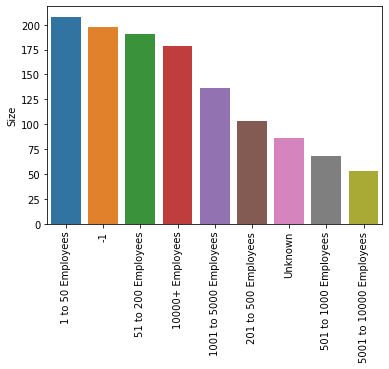

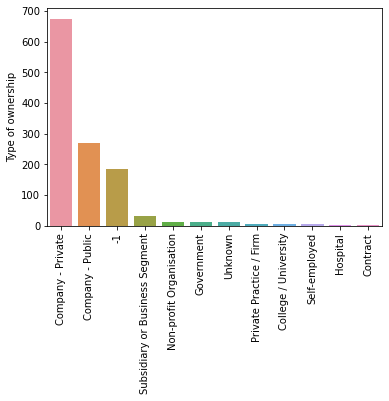

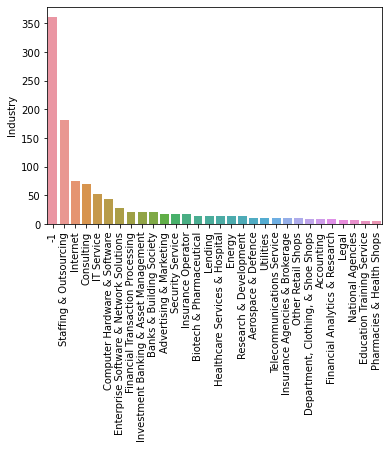

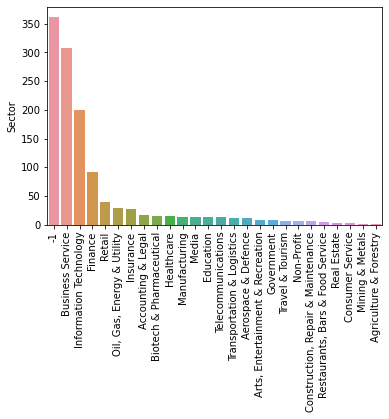

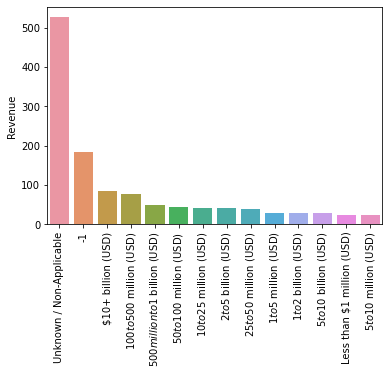

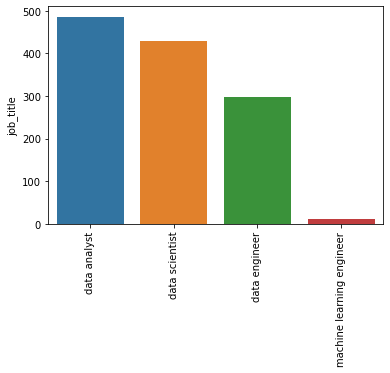

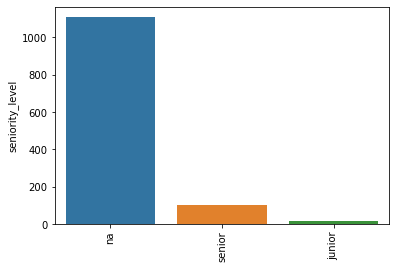

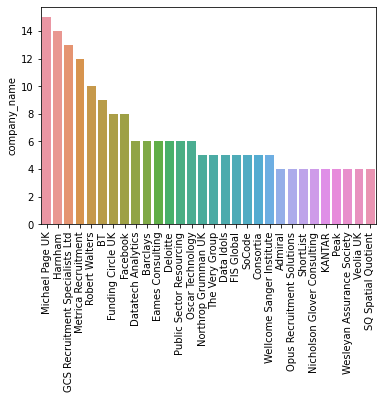

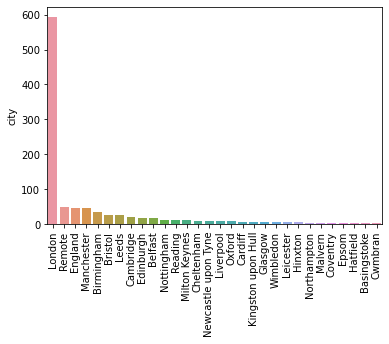

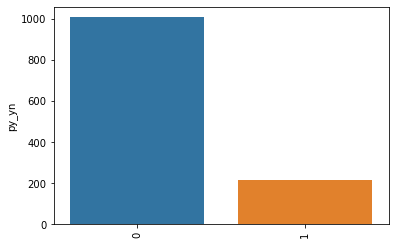

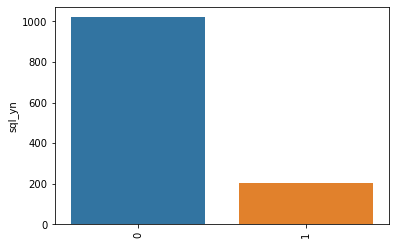

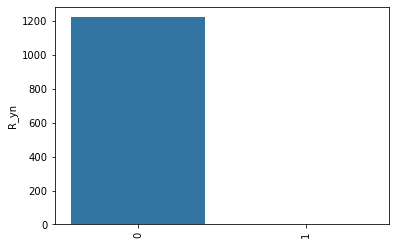

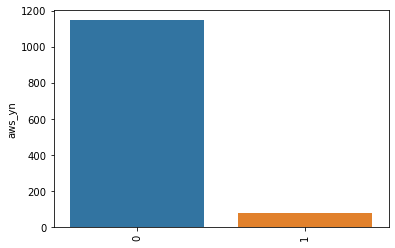

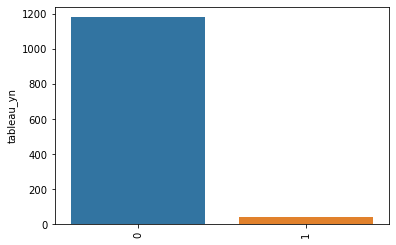

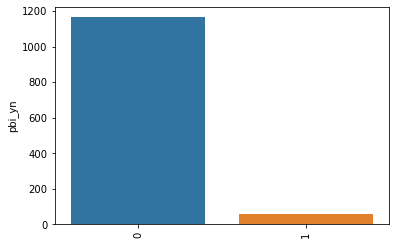

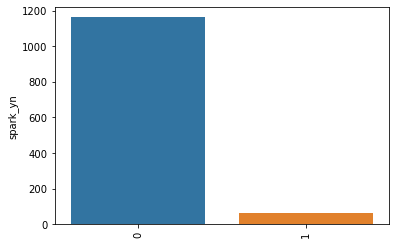

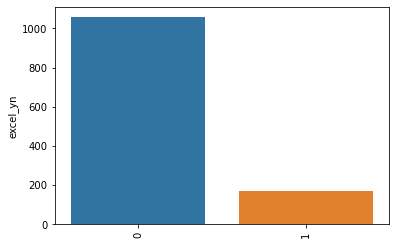

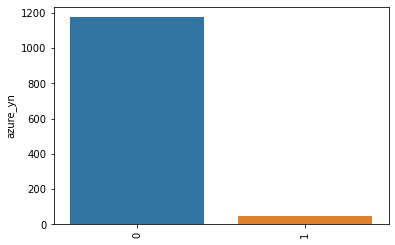

In [25]:
for cat in cat_col:
    cat_count = df[cat].value_counts()[:30]
    #print(cat_count)
    sns.barplot(x=cat_count.index, y=cat_count, data=df)
    plt.xticks(rotation=90)
    plt.show()



In [26]:
df.replace({'Size': '-1', 'Type of ownership': '-1','Industry': '-1','Sector': '-1'}, 'Unknown' ,inplace=True)
df.replace({'Revenue': '-1', }, 'Unknown / Non-Applicable' ,inplace=True)

In [27]:
pd.pivot_table(df, index='job_title', values='Avg_salary').sort_values(by='Avg_salary', ascending=False)

,Avg_salary
job_title,
data engineer,51.193603
machine learning engineer,48.272727
data scientist,47.748837
data analyst,36.671811


In [28]:
pd.pivot_table(df, index=['job_title','seniority_level'], values='Avg_salary')

Avg_salary
job_title                 seniority_level            
data analyst              junior            37.800000
                          na                36.647246
                          senior            37.333333
data engineer             junior            48.000000
                          na                51.429329
                          senior            46.307692
data scientist            junior            46.000000
                          na                47.776812
                          senior            47.805195
machine learning engineer na                49.500000
                          senior            36.000000

In [29]:
pd.pivot_table(df, index='age', values='Avg_salary').sort_values(by='Avg_salary', ascending=False).tail()

,Avg_salary
age,
182.0,29.75
98.0,29.50
193.0,28.00
187.0,26.00
33.0,26.00


In [30]:
pd.pivot_table(df, index='Revenue', values='Avg_salary').sort_values(by='Avg_salary', ascending=False)

,Avg_salary
Revenue,
$5 to $10 billion (USD),47.767857
$10+ billion (USD),46.215116
$2 to $5 billion (USD),45.134146
$50 to $100 million (USD),44.941860
Unknown / Non-Applicable,44.412799
$1 to $2 billion (USD),44.017241
$1 to $5 million (USD),43.933333
$10 to $25 million (USD),43.547619
$5 to $10 million (USD),43.413043


In [31]:
df[df.city == 'Remote'].pivot_table(index=['city','job_title'], values='Avg_salary',aggfunc='count')

Avg_salary
city   job_title                 
Remote data analyst            22
       data engineer           10
       data scientist          17

In [32]:
df[df.city == 'London'].pivot_table(index=['city','job_title'], values='Avg_salary',aggfunc='count')

Avg_salary
city   job_title                            
London data analyst                      195
       data engineer                     151
       data scientist                    240
       machine learning engineer           7

In [33]:
pd.pivot_table(df, index=['city','job_title','seniority_level'], values='Avg_salary',aggfunc='count').sort_values(by=['city','Avg_salary'], ascending=False)

Avg_salary
city                 job_title                 seniority_level            
York                 data analyst              na                        1
                     data engineer             na                        1
                     data scientist            na                        1
Worthing             data engineer             na                        1
Worcester            data analyst              na                        2
Woking               data analyst              na                        1
                     data scientist            na                        1
Witney               data scientist            na                        1
Witham               data analyst              na                        2
Winsford             data analyst              na                        1
Winnersh             data scientist            na                        2
Wimbledon            data engineer             na                        2
                     data scientist            na                        2
                     data analyst              na                        1
Wigan                data analyst              na                        3
Weybridge            data scientist            na                        1
West Sussex          data analyst              na                        1
Wembley              data analyst              na                        1
Welwyn Garden City   data scientist            senior                    2
                                               na                        1
Watford              data scientist            na                        1
Warwick              data analyst              na                        3
Warrington           data analyst              na                        2
Wales                data scientist            senior                    1
Wakefield            data analyst              na                        1
Victoria             data analyst              na                        1
Vauxhall             data scientist            na                        1
Tilbury              data analyst              na                        1
Theale               data analyst              na                        1
Tewkesbury           data scientist            na                        1
Telford              data analyst              na                        1
Teddington           data scientist            na                        1
Swindon              data analyst              na                        2
                     data scientist            na                        1
Swansea              data scientist            na                        1
Sutton Coldfield     data analyst              na                        2
Sunderland           data analyst              na                        1
Sunbury              data scientist            senior                    1
Stratford-upon-Avon  data engineer             na                        1
Stotfold             data analyst              na                        2
Stonehouse           data analyst              na                        1
Stockton-on-Tees     data engineer             na                        1
Stockport            data analyst              na                        1
                     data scientist            na                        1
Stevenage            data scientist            na                        2
                     data analyst              na                        1
                     data engineer             na                        1
Southampton          data analyst              na                        2
Solihull             data analyst              na                        1
Slough               data analyst              na                        1
Sheffield            data scientist            na                        1
                                               senior                    1
Sevenoaks     

In [34]:
pd.pivot_table(df, index='Rating', values='Avg_salary').sort_values(by='Rating', ascending=False)

,Avg_salary
Rating,
5.0,44.720000
4.9,48.928571
4.8,49.119048
4.7,46.222222
4.6,39.733333
4.5,43.318182
4.4,42.150000
4.3,51.338710
4.2,46.229885


# Modeling

In [35]:
df_model = df[['company_name','job_title','seniority_level','Rating','city','age','Type of ownership','Industry',
               'Sector', 'Revenue', 'Avg_salary','Size','py_yn', 'sql_yn', 'R_yn', 'aws_yn','azure_yn', 'tableau_yn', 
               'pbi_yn', 'spark_yn','excel_yn']]
df_model = df_model.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [36]:
df_model.head()

,company_name,job_title,seniority_level,Rating,city,age,Typeofownership,Industry,Sector,Revenue,Avg_salary,Size,py_yn,sql_yn,R_yn,aws_yn,azure_yn,tableau_yn,pbi_yn,spark_yn,excel_yn
0,Funding Circle UK,data scientist,na,3.9,London,11.0,Company - Private,Lending,Finance,$50 to $100 million (USD),36.0,501 to 1000 Employees,0,0,0,0,0,0,0,0,0
1,Funding Circle UK,data scientist,junior,3.9,London,11.0,Company - Private,Lending,Finance,$50 to $100 million (USD),36.0,501 to 1000 Employees,0,0,0,0,0,0,0,0,0
3,720 Management,data scientist,na,-1.0,London,-1.0,Unknown,Unknown,Unknown,Unknown / Non-Applicable,36.0,Unknown,0,0,0,0,0,1,1,0,0
5,UnitedHealth Group,data scientist,senior,3.6,London,-1.0,Unknown,Unknown,Unknown,Unknown / Non-Applicable,36.0,Unknown,0,0,0,0,0,0,0,0,0
6,Sky Betting & Gaming,data engineer,senior,4.6,Leeds,21.0,Company - Public,Internet,Information Technology,$500 million to $1 billion (USD),36.0,1001 to 5000 Employees,0,0,0,0,0,0,0,0,0


In [37]:
#df.columns 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import math

In [39]:
df_dummy = pd.get_dummies(df_model)
df_dummy = df_dummy.replace([np.inf, -np.inf], np.nan)
df_dummy.dropna(inplace=True)

df_dummy.shape

(1223, 1070)

In [40]:
df_dummy.head()

,Rating,age,Avg_salary,py_yn,sql_yn,R_yn,aws_yn,azure_yn,tableau_yn,pbi_yn,spark_yn,excel_yn,company_name_15gifts,company_name_1st Executive,company_name_3C Resource,company_name_720 Management,company_name_A.S. Watson Group,company_name_ADLIB,company_name_ASC Connections,company_name_ASDA,company_name_ASL,company_name_AWS EMEA SARL (UK Branch),company_name_AXA UK,company_name_Abbott Laboratories,company_name_Abbvie,company_name_Accelex,company_name_Achilles Therapeutics,company_name_AckermanPierce,company_name_Active Recruiting Consultants Ltd,company_name_Adarga,company_name_Admiral,company_name_Adria Solutions,company_name_Advanced Technical Recruitment,company_name_Aeromet International Ltd,company_name_Affinity Water,company_name_Ageas Insurance Limited,company_name_Agility Resourcing,"company_name_Agio, Inc.",company_name_Aiimi Ltd,company_name_Alchemy Recruitment Ltd,company_name_Alfred H Knight Group,company_name_Allen & York,company_name_Allen Recruitment Consulting,company_name_Allendevaux,company_name_Alliants Ltd,company_name_Amazon Dev Centre (London) Ltd,company_name_Amazon EU SARL (UK Branch),company_name_Amazon EU SarL (GBP),company_name_Amazon UK Services Ltd.,company_name_Ambitions Personnel,company_name_Ambitious Group,company_name_American Express,company_name_Ameriprise Financial,company_name_Amigo Technology Ltd,company_name_Anderson Clark Ltd,company_name_Angela Mortimer plc,company_name_Apple,company_name_Appsbroker,company_name_Argus Media,company_name_Artefact,company_name_Artis Recruitment,company_name_Arup,company_name_Asahi UK,company_name_Ascendant Recruitment,company_name_Ascential,company_name_Ashdown Group,company_name_Asos.com,company_name_AstraZeneca,company_name_Atkins,company_name_Atom Learning,company_name_Attentiv,company_name_Attest,company_name_Augmize,company_name_Austin Consultants,company_name_Austin Fraser,company_name_Auto Trader,company_name_Avado,company_name_Avanade,company_name_Aviva,company_name_Ayasdi,company_name_B2E Consulting Ltd,company_name_BGC Partners,company_name_BJSS,company_name_BSI,company_name_BT,company_name_Babcock UK,company_name_Babylon Health,company_name_Barclay Meade,company_name_Barclays,company_name_Bartec Municipal Technologies,company_name_Baxi Heating,company_name_BayWa r.e.,company_name_Behold.ai,company_name_Bellrock FM,company_name_BenevolentAI,company_name_Betway Group,company_name_Biffa Waste Services,company_name_Blockchain.com,company_name_Bloom Procurement Services,company_name_Bloomberg,company_name_BluGem Communications Ltd,company_name_Blue Legal,company_name_Boots,company_name_Booz Allen Hamilton,company_name_Bottomline Technologies,company_name_Boulevard Online,company_name_BrainStation,company_name_Brit Group Services,company_name_Bud,company_name_Bulb,company_name_Bumble,company_name_Burns Sheehan,company_name_Buzz Bingo,company_name_CAPCO,company_name_CBRE,company_name_CBSbutler,company_name_CBT Clinics,company_name_CGA Strategy Ltd,company_name_CGI,company_name_CIPFA,company_name_CK Group,company_name_CKM Analytix,company_name_CMSPI,company_name_CRD Recruitment,company_name_CRISP,company_name_CTS,company_name_CV Screen,company_name_CVS UK Ltd,company_name_Cabot Financial,company_name_Cadent Gas,company_name_Canopius,company_name_Capco,company_name_Capital Group,company_name_Careers at Depop,company_name_Carrot Pharma Recruitment,company_name_Caspian Learning,company_name_Cast UK Limited,company_name_CatchFish,company_name_Cathcart Associates,company_name_Central Employment Agency,company_name_Centre for Reproductive Immunology & Pregnancy,company_name_Cera Care,company_name_Certes,company_name_Certus Technology Associates,company_name_Chase and Holland,company_name_Checkout.com,company_name_Cignpost Diagnostics Ltd,company_name_Cinch Cars,company_name_Citi,company_name_CitizenMe,company_name_Citymapper,company_name_Client Server,company_name_Climate X,company_name_Cloister Resourcing,company_name_Close Brothers Group,company_name_Cloud

In [41]:
X = df_dummy.drop('Avg_salary', axis=1)
y = df_dummy.Avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [42]:
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (978, 1069)
Shape of y_train: (978,)
Shape of X_test: (245, 1069)
Shape of y_test: (245,)


# Traning

In [43]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)

lr_cv = np.mean(cross_val_score(lr,X_train,y_train,scoring='neg_mean_absolute_error'))
print('Linear Regression Cross Validation -ve mean absolute error:%.2f'  % lr_cv)

Linear Regression Cross Validation -ve mean absolute error:-14739230888.56


In [44]:
#randon forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

rf_cv = np.mean(cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error'))
print('Randon Forest Cross Validation -ve mean absolute error:%.2f'  % rf_cv)

Randon Forest Cross Validation -ve mean absolute error:-9.22


In [45]:
#XGBoost
xgbr = XGBRegressor(booster='gbtree')
xgbr.fit(X_train,y_train)
xgbr_cv = np.mean(cross_val_score(xgbr,X_train,y_train,scoring='neg_mean_absolute_error'))
print('XGBoost Cross Validation -ve mean absolute error:%.2f'  % xgbr_cv)

XGBoost Cross Validation -ve mean absolute error:-9.59


In [46]:
#lgbmr = LGBMRegressor()
#lgbmr.fit(X_train,y_train)
#lgbmr_cv = np.mean(cross_val_score(lgbmr,X_train,y_train,scoring='neg_mean_absolute_error'))
#print('XGBoost Cross Validation -ve mean absolute error:', lgbmr_cv)

# Testing

In [47]:
pred_lr = lr.predict(X_test)
pred_rf = rf.predict(X_test)
pred_xgb = xgbr.predict(X_test)

In [48]:
lr_error = mean_absolute_error(y_test,pred_lr)
print('Linear Regression Cross Validation mean absolute error:%.2f'  % lr_error)
rf_error = mean_absolute_error(y_test,pred_rf)
print('Randon Forest Cross Validation mean absolute error:%.2f'  %rf_error)
xgb_error = mean_absolute_error(y_test,pred_xgb)
print('XGBoost Cross Validation mean absolute error:%.2f'  % xgb_error)

Linear Regression Cross Validation mean absolute error:25.81
Randon Forest Cross Validation mean absolute error:8.67
XGBoost Cross Validation mean absolute error:8.93


In [49]:
print('Accuracy of Linear Regression:%.2f'  % (100-(np.mean((np.abs(y_test-pred_lr)/y_test))*100)))
print('Accuracy of Random Forest:%.2f'  % (100-(np.mean((np.abs(y_test-pred_rf)/y_test))*100)))
print('Accuracy of XGBoost:%.2f'  % (100-(np.mean((np.abs(y_test-pred_xgb)/y_test))*100)))


Accuracy of Linear Regression:39.79
Accuracy of Random Forest:81.10
Accuracy of XGBoost:79.78
